In [1]:
import sys; sys.path.append("../../")
from DataPreprocessing.DataPreprocessing import *
from DataExploration.DataExploration import *
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

# Question:
    For each genre, Will its sales increase over upcoming years?

## 1- Expectations: 
   

## Read Data 

In [15]:
df = read_data(kind='dataset')
df = df.dropna()

In [16]:
# read the data
df_train=read_data(kind='all')
df_val = read_data(kind='val')
selected_cols=[ 'Genre', 'Year_of_Release',  'Global_Sales']
df_train = df_train[selected_cols]
df_val = df_val[selected_cols]
df_train.head()

,Genre,Year_of_Release,Global_Sales
0,Sports,2006.0,82.53
1,Platform,1985.0,40.24
2,Racing,2008.0,35.52
3,Sports,2009.0,32.77
4,Role-Playing,1996.0,31.37


In [17]:
df_train_all_genre=[] #list of dataframes for each genre
df_val_all_genre=[]

genres = df_train['Genre'].unique()
for i, genre in  enumerate(genres):
    print(i, genre)
    df_train_all_genre.append( df_train[df_train['Genre'] ==genre])
    df_val_all_genre.append( df_val[df_val['Genre'] ==genre])

0 Sports
1 Platform
2 Racing
3 Role-Playing
4 Puzzle
5 Misc
6 Shooter
7 Simulation
8 Action
9 Fighting
10 Adventure
11 Strategy
12 nan


In [18]:
#print length of action games
print("Number of action games in training set: ", len(df_train_all_genre[8])) #action

Number of action games in training set:  3370


In [20]:
df_train_all_genre[8].head()

,Genre,Year_of_Release,Global_Sales
16,Action,2013.0,21.04
17,Action,2004.0,20.81
23,Action,2013.0,16.27
24,Action,2002.0,16.15
38,Action,2001.0,13.10


In [21]:
# group by year and sum global sales
df_train_all_genre[8] ['Global_Sales']= df_train_all_genre[8].groupby('Year_of_Release')['Global_Sales'].sum()


C:\Users\dell\AppData\Local\Temp\ipykernel_16256\2518868588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_all_genre[8] ['Global_Sales']= df_train_all_genre[8].groupby('Year_of_Release')['Global_Sales'].sum()


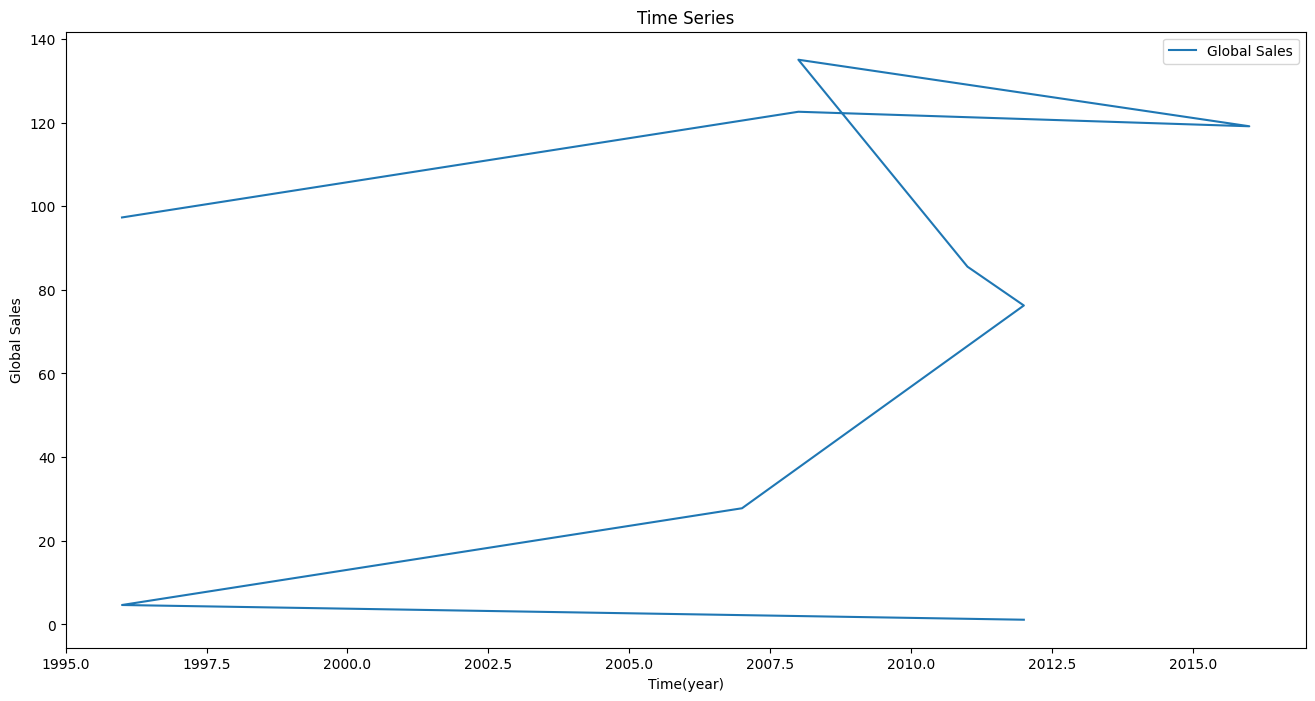

In [22]:
plt.figure(figsize=(16,8)) 
plt.plot(  df_train_all_genre[8] ['Year_of_Release'] ,df_train_all_genre[8] ['Global_Sales'], label='Global Sales') 
plt.title('Time Series') 
plt.xlabel("Time(year)") 
plt.ylabel("Global Sales") 
plt.legend(loc='best')

In [39]:
from statsmodels.tsa.arima.model import ARIMA

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [41]:
ARMAmodel = SARIMAX(df_train_action['Global_Sales'], order = (1, 0, 1))

c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [42]:
ARMAmodel_fit = ARMAmodel.fit()

                               SARIMAX Results                                
Dep. Variable:           Global_Sales   No. Observations:                 3370
Model:               SARIMAX(2, 0, 0)   Log Likelihood                3368.973
Date:                Mon, 15 May 2023   AIC                          -6731.946
Time:                        07:44:56   BIC                          -6713.580
Sample:                             0   HQIC                         -6725.379
                               - 3370                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8788      0.005    181.348      0.000       0.869       0.888
ar.L2          0.0700      0.005     15.514      0.000       0.061       0.079
sigma2         0.0079   5.68e-05    139.455      0.0

c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


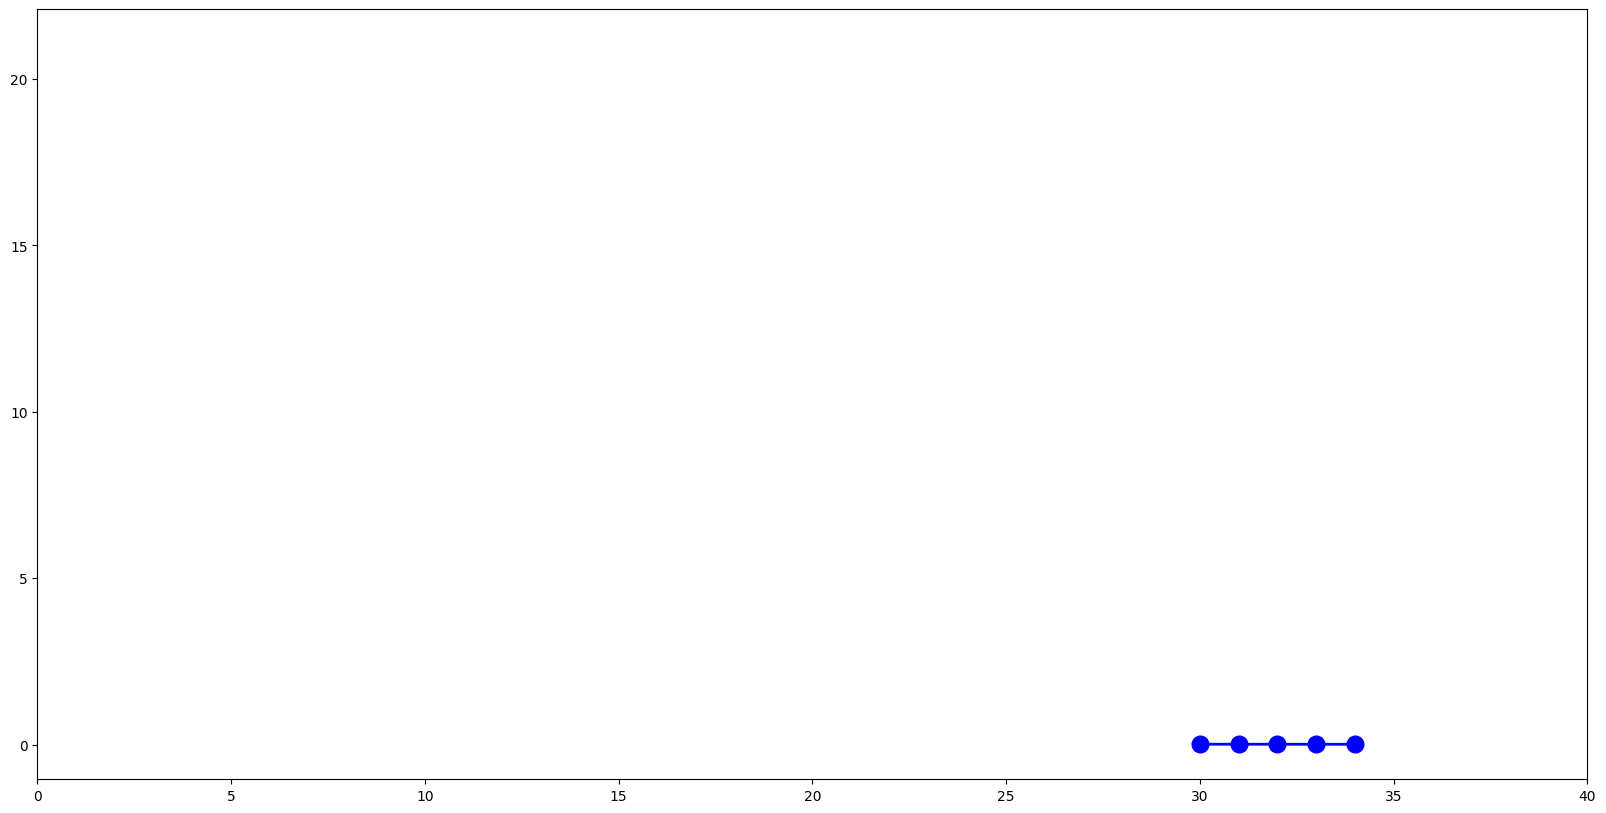

In [51]:
# import matplotlib.pyplot as plt
# import statsmodels.api as sm
# import numpy as np

# np.random.seed(100)

# steps_to_predict = 5

# model = sm.tsa.statespace.SARIMAX(endog=df_train_action['Global_Sales'],order=(2,0,0),enforce_stationarity=False)
# sarima = model.fit()
# print(sarima.summary())

# # plot   
# fig, ax = plt.subplots(1,1, figsize=(20,10))
# ax.set_xlim(0,40)
# ax.plot(df_train_action['Global_Sales'], "ro-", linewidth=2, markersize=12)
# ax.plot(list(range(30,35)), sarima.forecast(steps_to_predict), "bo-", linewidth=2, markersize=12)

In [59]:
print(df_month['Month'])

Month
2008-01    2008-01
2008-02    2008-02
2008-03    2008-03
2008-04    2008-04
2008-05    2008-05
            ...   
2013-05    2013-05
2013-06    2013-06
2013-07    2013-07
2013-08    2013-08
2013-09    2013-09
Name: Month, Length: 69, dtype: object
